# COMUNICACIONES DIGITALES
> Máster en Ingeniería de Telecomunicación<br>
> Curso 2021/22

## Práctica 1d - Codificación de imágenes

En esta práctica vamos a ver algunas ideas relacionadas con la codificación de fuente. 

En concreto estudiaremos el caso de un codificador Huffman.
 

### 1 - GENERACIÓN DEL MENSAJE
Generamos un mensaje que será la entrada a nuestro sistema. Se puede probar, si se quiere, con mensajes más largos o incluso con otros tipos de archivos de entrada.

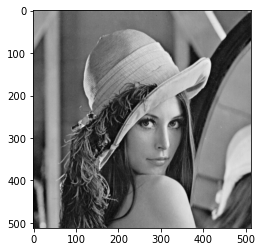

In [2]:
######################
# LIBRERÍAS NECESARIAS
######################
import matplotlib.pyplot as plt     # Para procesar el mapa de colores de la imagen
import matplotlib.image as mpimg    # Para leer y grabar imágenes
import scipy.fftpack                # Transformada del coseno n-dimensional (DCT e IDCT)
import numpy as np                  # Librería matemática

#############################
# PARÁMETROS DE CONFIGURACIÓN
#############################
fichero_entrada = "entrada.bmp"
fichero_salida = "salida.bmp"
#Factor de calidad para la codificación. Cuanto mayor sea, peor será el resultado
factor_calidad = 1          

###############
# PASOS PREVIOS
###############
#Leo la imagen de entrada
img = mpimg.imread(fichero_entrada).astype(int)-128
imgplot = plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.show()

#Esta es la matriz de cuantificación de JPEG. Se aplica a cada bloque de 8x8 píxeles
Q = np.array([  [16, 11, 10, 16, 24, 40, 51, 61],
                [12, 12, 14, 19, 26, 58, 60, 55],
                [14, 13, 16, 24, 40, 57, 69, 56],
                [14, 17, 22, 29, 51, 87, 80, 62],
                [18, 22, 37, 56, 68, 109, 103, 77],
                [24, 35, 55, 64, 81, 104, 113, 92],
                [49, 64, 78, 87, 103, 121, 120, 101],
                [72, 92, 95, 98, 112, 100, 103, 99]])
#Reescalo la matriz de cuantificación según el factor de calidad
Q = Q*factor_calidad    


### 2 - CÁLCULOS PREVIOS
Antes de realizar la codificación, calculo el número de bits necesarios para codificar el mensaje tal cual, sin hacer nada, y cuál sería el mínimo teórico según el cálculo de la entropía.

In [3]:
bytes = 0
print(f"Tamaño mínimo teórico: {bytes:.3f} bytes")

Tamaño mínimo teórico: 0.000 bytes


### 3 - TRANSFORMADA DCT
Comenzamos con la codificación Huffmann. 
En primer lugar calculo el diccionario adaptado al mensaje de entrada, y muestro el resultado. 
 - **CodFuente.gen_huffman_dic**: Genera dos diccionarios para la codificación Huffman: *probabilidades* con pares símbolo/probabilidad y *códigos* con pares símbolo/código binario.


In [4]:
#Paso 1: Calculo la transformada DCT de cada bloque de 8x8 píxeles
img_DCT = np.zeros(img.shape, dtype=float)
for x in range(0,img.shape[0],8):
    for y in range(0,img.shape[1],8):
        bloque = img[x:x+8,y:y+8]
        bloqueDCT = scipy.fftpack.dctn(bloque,norm='ortho')
        img_DCT[x:x+8,y:y+8] = bloqueDCT

### 4 - CUANTIFICACIÓN
Utilizando el diccionario de antes, codifico el mensaje y calculo su tamaño una vez codificado. 

In [5]:
#Paso 2: Cuantifico cada uno de los bloques utilizando la matriz de cuantificación Q
img_Q = np.zeros(img.shape, dtype=float)
for x in range(0,img.shape[0],8):
    for y in range(0,img.shape[1],8):
        bloque = img_DCT[x:x+8,y:y+8]
        bloque_Q = np.round(bloque/Q)
        img_Q[x:x+8,y:y+8] = bloque_Q
img_Q = img_Q.astype(np.int8)

### 5 - CODIFICACIÓN 
Por último, y para comprobar que todo funciona, decodifico el mensaje y compruebo que el resultado coincide con el mensaje original.

In [6]:
#Paso 3: Codificación fuente de la imagen
from CodFuente import gen_huffman_dic
diccionario, codigos = gen_huffman_dic(img_Q)
bits = ""
for x in range(0,img.shape[0]):
    for y in range(0,img.shape[1]):
        pixel = img_Q[x,y]
        bits += codigos[pixel]

KB = 0
print("Tamaño de la imagen JPEG: %.1f" % KB, "KBytes")

Tamaño de la imagen JPEG: 0.0 KBytes


### 6 - CUANTIFICACIÓN INVERSA

In [7]:
#Paso 4: Cuantificación inversa
img_IQ = np.zeros(img.shape, dtype=float)
for x in range(0,img.shape[0],8):
    for y in range(0,img.shape[1],8):
        bloque = img_Q[x:x+8,y:y+8]
        bloque_IQ = bloque*Q
        img_IQ[x:x+8,y:y+8] = bloque_IQ

### 7 - CUANTIFICACIÓN INVERSA

In [8]:
#Paso 5: Transformada inversa de cada bloque
salida = np.zeros(img.shape, dtype=float)
for x in range(0,img.shape[0],8):
    for y in range(0,img.shape[1],8):
        bloque = img_IQ[x:x+8,y:y+8]
        bloqueIDCT = scipy.fftpack.idctn(bloque, norm='ortho')
        salida[x:x+8,y:y+8] = bloqueIDCT


### 8 - SALIDA

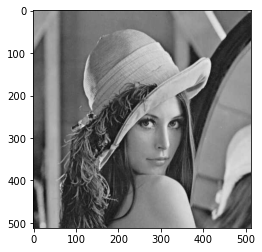

In [9]:
#Convierto todo a entero sin signo de 8 bits y grabo el archivo
salida = 128+salida.astype(np.uint8)
#mpimg.imsave(fichero_salida,salida, cmap=plt.get_cmap('gray'))
imgplot = plt.imshow(salida, cmap=plt.get_cmap('gray'))
plt.show()

